# Curate training data for promiscuity model

Here, I only included the EnzymeCAGE_train.csv but not the EnzymeCAGE_valid.csv. Maybe in the future, I will/should include both?!

In [1]:
# Data from EnzymeCAGE

import pandas as pd

df_train = pd.read_csv('/nvme2/helen/masterthesis/manuscript/data/EnzymeCAGE_train.csv')
df_valid = pd.read_csv('/nvme2/helen/masterthesis/manuscript/data/EnzymeCAGE_valid.csv',  low_memory=False)
df_protein = pd.read_pickle('/home/helen/cec_degrader/generalize/data/protein.pkl')

# Combine validation and training data
df_CAGE = pd.concat([df_train, df_valid], axis=0).reset_index(drop=True)

In [2]:
df_CAGE

,RHEA_ID,DIRECTION,MASTER_ID,UniprotID,SMILES,EC number,CANO_RXN_SMILES,sequence,reverse_template,n_seq,rxnmapper_template,localmapper_template,Label,key,direct_weight,rank_weight_light,rank_weight_hard
0,54184,UN,54184,Q46HE9,*C(=O)N[C@@H](*)C(=O)[O-].[H]O[H]>>*[C@H]([NH3...,3.5.1.114,*C(=O)N[C@@H](*)C(=O)O.O>>*[C@H](N)C(=O)O.[1*]...,MKQLQVLLVAGTHGNEINGIWLFDEWKKSSFLINTHGIKTFKVIGN...,[C;D1;H0:1]-[C;H0;D3;+0:2](-[O-;H0;D1:9])=[O;D...,305,[C;D1;H3:1]-[C;H0;D3;+0:2](=[O;D1;H0:3])-[OH;D...,[C;D1;H3:1]-[C;H0;D3;+0:2](=[O;D1;H0:3])-[OH;D...,0,*C(=O)N[C@@H](*)C(=O)O.O>>*[C@H](N)C(=O)O.[1*]...,0.683537,0.6,0.200000
1,47032,UN,47032,A3QFX9,*O[C@H]1[C@@H](O)[C@H](N2C=CC(=O)NC2=O)O[C@@H]...,2.8.1.13,*N[C@@H](CSS)C(*)=O.*O[C@H]1[C@@H](O)[C@H](n2c...,MLKLYNSLTRQKEEFKPIQPGKVGMYVCGVTIYDLCHIGHGRTFVA...,[#7;a:1]:[c;H0;D3;+0:2](:[#7;a:3])=[S;H0;D1;+0...,371,[#15:1]-[OH;D1;+0:2].[#7;a:7]:[c;H0;D3;+0:8](:...,[#7;a:1]:[c;H0;D3;+0:2](:[#7;a:3])=[S;H0;D1;+0...,0,*N[C@@H](CSS)C(*)=O.*O[C@H]1[C@@H](O)[C@H](n2c...,0.520837,0.5,0.100000
2,25432,UN,25432,Q043F6,O[C@@H]1[C@H](O)[C@H](O)CO[C@H]1O>>OC[C@H]1O[C...,5.4.99.62,O[C@@H]1[C@H](O)[C@H](O)CO[C@H]1O>>OC[C@H]1O[C...,MKKTGVMNSNISRVIADMGHMDWLGVGDAGTPVPAETEKIDLSVRP...,[C:1]-[C@H;D3;+0:2](-[O;D1;H1:3])-[O;H0;D2;+0:...,131,[O;D1;H1:1]-[C@@H;D3;+0:2]1-[C@@H;D3;+0:9](-[C...,[C:1]-[C@H;D3;+0:2](-[O;D1;H1:3])-[O;H0;D2;+0:...,1,O[C@@H]1[C@H](O)[C@H](O)CO[C@H]1O>>OC[C@H]1O[C...,0.200000,0.5,0.100000
3,42628,UN,42628,Q9AJG9,*O[C@H]1[C@@H](O)[C@H](N2C=CC(=O)NC2=O)O[C@@H]...,2.1.1.189,*O[C@H]1[C@@H](O)[C@H](n2ccc(=O)[nH]c2=O)O[C@@...,MTESFQHISVLLHESIEGLAIKPDGIYIDGTFGRGGHSRTILSQLG...,[#7;a:1]:[c:2]:[c;H0;D3;+0:3](-[CH3;D1;+0:9]):...,384,[#7;a:1]:[c:2]:[c;H0;D3;+0:3](-[CH3;D1;+0:9]):...,[#7;a:1]:[c:2]:[c;H0;D3;+0:3](-[CH3;D1;+0:9]):...,0,*O[C@H]1[C@@H](O)[C@H](n2ccc(=O)[nH]c2=O)O[C@@...,0.736282,0.5,0.125000
4,19469,UN,19469,P40609,[N]=O.[N]=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(...,1.14.12.17,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,MLSNQTIEIVKATAPLIAETGPKLTAHFYDRMFTHNPELKDIFNMS...,[#8:1]-[C:2]-[n+;H0;D3:3]1:[cH;D2;+0:4]:[c;H0;...,394,[#8:1]-[C:2]-[n+;H0;D3:3]1:[cH;D2;+0:4]:[c;H0;...,[#8:1]-[C:2]-[n+;H0;D3:3]1:[cH;D2;+0:4]:[c;H0;...,1,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,0.848634,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513587,59908,UN,59908,Q60HH8,[H]C(=O)CCCCC.NC(=O)C1=CC=C[N+]([C@@H]2O[C@H](...,NaN,CCCCCC=O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,MEREVQRVRQAFLSGRSRPLRFRLQQLEALRRMVQEREKDILAAIA...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[C;H...,468,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[C;H...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[C;H...,0,CCCCCC=O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,0.725597,0.5,0.111111
1513588,10020,UN,10020,P00386,[NH3+][C@@H](CCCC[NH2+][C@@H](CCC(=O)[O-])C(=O...,1.5.1.10,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,MAITLSATSLPISAADHHPLPLTVGVLGSGHAGTALAAWFASRHVP...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,450,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,0.685281,0.5,0.166667
1513589,11296,UN,11296,P00370,[H]C(=O)CCC(=O)C(=O)[O-].NC(=O)C1=CC=C[N+]([C@...,1.2.1.26,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,482,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,0.884706,1.0,1.000000
1513590,13217,UN,13217,Q7U2I0,O=CCCC(=O)[O-].NC(=O)C1=CC=C[N+]([C@@H]2O[C@H]...,1.2.1.24,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,MPIATINPATGETVKTFTAATDDEVDAAIARAHRRFADYRQTSFAQ...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:17]=[CH...,457,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:4]=[CH;...,[#8:1]-[C:2]-[N;H0;D3;+0:3]1-[CH;D2;+0:17]=[CH...,1,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,0.848634,1.0,1.000000


### Filter all esterases

In [13]:
# Positive samples only
df = df_CAGE[df_CAGE['Label'] == 1]

# Add EC number from protein.pkl if not present 
ec_mapping = df_protein.groupby('Entry')['EC number'].apply(list).to_dict()
df['EC number'] = df['UniprotID'].map(ec_mapping)
df['EC number'] = df['EC number'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Keep only enzymes with at least one EC 3.1.* annotation
uniprot_with_3_1 = df.loc[df['EC number'].fillna('').str.startswith('3.1.'), 'UniprotID']
df = df[df['UniprotID'].isin(uniprot_with_3_1)].copy()

# Remove enzymes that also have non-3.1 ECs
df = df[df['EC number'].fillna('').apply(
        lambda x: all(ec.strip().startswith('3.1') for ec in x.split(';'))
    )]

df = df.reset_index(drop=True)
#df.to_pickle('data/EnzymeCAGE_train_all_EC3p1.pkl')

# Keep only one entry per UniprotID (i.e. the first occurrence)
df = df.drop_duplicates(subset='UniprotID', keep='first').reset_index(drop=True)
#df.to_pickle('data/EnzymeCAGE_train_all_EC3p1_unique_UniprotID.pkl')

/tmp/ipykernel_1585043/3384390345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC number'] = df['UniprotID'].map(ec_mapping)
/tmp/ipykernel_1585043/3384390345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC number'] = df['EC number'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


### Filter down to all promiscuous enzymes with EC 3.1

In [16]:
# Positive samples only
df = df_CAGE[df_CAGE['Label'] == 1]

# Add EC number from protein.pkl if not present 
ec_mapping = df_protein.groupby('Entry')['EC number'].apply(list).to_dict()
df['EC number'] = df['UniprotID'].map(ec_mapping)
df['EC number'] = df['EC number'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Filter to (catalytically) promiscuous enzymes (i.e. present more than once in df)
filtered_df = df[df['UniprotID'].duplicated(keep=False)]
df  = filtered_df.sort_values(by='UniprotID')
df = df.reset_index(drop=True)

# Split reaction SMILEs into substrates and products
df[['substrates', 'products']] = df['SMILES'].str.split('>>', expand=True)

# Number of substrates and products per entry
df['number_substrates'] = df['substrates'].str.count('\.') + 1
df['number_products'] = df['products'].str.count('\.') + 1

# Filter to only promiscuous esterases
uniprot_with_3_1 = df.loc[df['EC number'].fillna('').str.startswith('3.1.'), 'UniprotID']
df_EC3p1 = df[df['UniprotID'].isin(uniprot_with_3_1)].copy()
df_EC3p1 = df_EC3p1.reset_index(drop=True)

# Remove entries, with EC classes other than EC 3.1 annotated with them
df_only_EC3p1 = df_EC3p1[df_EC3p1['EC number'].fillna('').apply(
        lambda x: all(ec.strip().startswith('3.1') for ec in x.split(';'))
    )]


<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_1585043/3710230118.py:18: SyntaxWarning: invalid escape sequence '\.'
  df['number_substrates'] = df['substrates'].str.count('\.') + 1
/tmp/ipykernel_1585043/3710230118.py:19: SyntaxWarning: invalid escape sequence '\.'
  df['number_products'] = df['products'].str.count('\.') + 1
/tmp/ipykernel_1585043/3710230118.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC number'] = df['UniprotID'].map(ec_mapping)
/tmp/ipykernel_1585043/3710230118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

### Filter down to substrate promiscuous enzymes by removing catalytically promiscuous enzymes

In [17]:
df = df_only_EC3p1.copy()

# Create cannonical substrate strings to detect duplicate substrates 
def canonical_substrates(substrates):
    parts = substrates.split('.')
    parts = sorted([p.strip() for p in parts])
    return '.'.join(parts)

df['substrates_canonical'] = df['substrates'].str.strip().apply(canonical_substrates)

# For each UniprotID, remove catalytically promiscuous enzymes by filtering out rows with identical substrates
def filter_unique_substrates(group):
    counts = group['substrates_canonical'].value_counts()
    unique_substrates = counts[counts == 1].index
    return group[group['substrates_canonical'].isin(unique_substrates)]

df_unique = df.groupby('UniprotID', group_keys=False).apply(filter_unique_substrates).reset_index(drop=True)
df_unique = df_unique.drop(columns=['substrates_canonical'])
df_unique = df_unique[df_unique['UniprotID'].duplicated(keep=False)]
df_unique = df_unique.sort_values(by='UniprotID')


/tmp/ipykernel_1585043/1547045383.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique = df.groupby('UniprotID', group_keys=False).apply(filter_unique_substrates).reset_index(drop=True)


### Filter down to substrates in which ester bonds are broken

In [22]:
# Generate atom-mapped reactions

from rxnmapper import RXNMapper
import pandas as pd
import time
import torch

df_mapped_rxn = df_unique.copy()

rxn_mapper = RXNMapper()
batch_size = 5  # adjust depending on your GPU
mapped_smiles = []

for i in range(0, len(df_mapped_rxn), batch_size):
    batch = df_mapped_rxn['SMILES'].iloc[i:i + batch_size].tolist()
    try:
        results = rxn_mapper.get_attention_guided_atom_maps(batch)
        mapped_smiles.extend([r['mapped_rxn'] for r in results])
    except Exception as e:
        print(f"Error at batch {i}: {e}")
        mapped_smiles.extend([None] * len(batch))  # mark failed mappings

df_mapped_rxn['atom_mapped_SMILES'] = mapped_smiles

# Remove H20 and H+ as a substrate
def remove_water_and_protons(reaction_smiles):
    if pd.isna(reaction_smiles):
        return reaction_smiles
    reactants = reaction_smiles.split('>')[0].split('.')
    reactants = [p for p in reactants if p not in ('[H]O[H]', '[H+]', '[H]')]
    return '.'.join(reactants)

# Assign substrates as 'cleaved' that have only one substrate left after removing H20 and H+
def assign_cleaved_substrate_if_unique(reaction_smiles):
    
    try:
        reactants = reaction_smiles.split('>')[0].split('.')
        reactants = [r.strip() for r in reactants if r]  # Remove empty strings

        if len(reactants) == 1:
            return reactants
    except:
        return None

df_mapped_rxn['SMILES'] = df_mapped_rxn['SMILES'].apply(remove_water_and_protons)
df_mapped_rxn['cleaved_substrate'] = df_mapped_rxn['SMILES'].apply(assign_cleaved_substrate_if_unique)



In [39]:
# Detect substrate that is being hydroylzed i.e. that has an ester bond that is being cleaved

from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw

def atoms_connected_in_products(product_mols, c_map, o_map):
    '''
    Check if two atoms (by atom map numbers) are connected by a bond
    in any of the product molecules.
    Returns True if atoms are connected in any product, False otherwise i.e. when 
    the ester bond has been cleaved. 
    '''
    for mol in product_mols:
        if mol is None:
            continue

        # Create map number to index lookup
        mapnum_to_idx = {atom.GetAtomMapNum(): atom.GetIdx()
                         for atom in mol.GetAtoms() if atom.GetAtomMapNum() != 0}

        # Check if both atoms exist in this molecule
        if c_map in mapnum_to_idx and o_map in mapnum_to_idx:
            idx1 = mapnum_to_idx[c_map]
            idx2 = mapnum_to_idx[o_map]

            if mol.GetBondBetweenAtoms(idx1, idx2) is not None:
                return True  # Bond is present

    return False  # not connected in any product

def detect_ester_cleaved_reactants(row):
    '''
    dentifies reactant molecules in a chemical reaction that undergo cleavage at ester or ester-like functional groups, 
    using SMARTS patterns and atom mapping. It returns a list of unique substrate SMILES 
    where a bond between ester atoms is broken in the product.
    '''
    mapped_rxn_smiles = row['atom_mapped_SMILES']
    unmapped_rxn_smiles = row['SMILES']

    ester_smarts_list = [
    '[CX3](=O)[OX2H0][#6]',         # Regular ester
    '[CX3](=O)[SX2H0][#6]',         # Thioester
    '[CX3](=O)[OX2H0][C;R]',        # Lactone (cyclic ester)
    '[P;D4](=O)([O-,OX2][#6])([O-,OX2])([O-,OX2])', # Mono, di and tri-phosphate esters
    '[P;D4](=O)([O-,OX2][#6])([O-,OX2])([*])', # Phosphate with wildcard
    '[P;D4](=O)([O-,OX2][#6])([*])([O-,OX2])', # Phosphate with wildcard
    '[CX3](=O)[OX2H0][*]'            # Ester with wildcard rest
]
    ester_patterns = [(smarts, Chem.MolFromSmarts(smarts)) for smarts in ester_smarts_list]
    cleaved_reactants = []

    try:
        reactant_smiles, product_smiles = mapped_rxn_smiles.split(">>")
        reactants = reactant_smiles.split(".")
        products = product_smiles.split(".")

        reactant_smiles_unmapped, product_smiles_unmapped = unmapped_rxn_smiles.split(">>")
        reactants_unmapped = reactant_smiles_unmapped.split(".")

    except Exception:
        return []

    try:
        product_mols = [Chem.MolFromSmiles(p) for p in products]
        product_atoms = {}
        for mol in product_mols:
            if mol:
                for atom  in mol.GetAtoms():
                    amap = atom.GetAtomMapNum()
                    if amap != 0:
                        product_atoms[amap] = atom 
    except Exception:
        return []

    for r_smiles, substrate_smile_string in zip(reactants, reactants_unmapped):
        try:
            reactant = Chem.MolFromSmiles(r_smiles)
            if not reactant:
                continue

            ester_matches = []

            for smarts, pattern in ester_patterns:
                matches = reactant.GetSubstructMatches(pattern)
                if matches:
                    for match in matches: 
                        ester_matches.append((smarts, match))
            

            #print(f'ester matches {ester_matches}')

            for smarts, match in ester_matches:
                
                if smarts == '[CX3](=O)[OX2H0][#6]':
                    if len(match) != 4:
                        continue
                    c_idx, db_o_idx, o_idx, r_idx = match
                    c_map = reactant.GetAtomWithIdx(c_idx).GetAtomMapNum()
                    o_map = reactant.GetAtomWithIdx(o_idx).GetAtomMapNum()
                    r_map = reactant.GetAtomWithIdx(r_idx).GetAtomMapNum()
                    

                elif smarts == '[CX3](=O)[SX2H0][#6]':
                    if len(match) != 4:
                        continue
                    c_idx, db_o_idx, s_idx, r_idx = match
                    c_map = reactant.GetAtomWithIdx(c_idx).GetAtomMapNum()
                    o_map = reactant.GetAtomWithIdx(s_idx).GetAtomMapNum()
                    r_map = reactant.GetAtomWithIdx(r_idx).GetAtomMapNum()


                elif smarts == '[P;D4](=O)([O-,OX2][#6])([O-,OX2])([O-,OX2])' or smarts == '[P;D4](=O)([O-,OX2][#6])([O-,OX2])([*])' or smarts == '[P;D4](=O)([O-,OX2][#6])([*])([O-,OX2])':
                    if len(match) != 6:
                        continue

                    p_idx, db_o_idx, o_ester_idx, r_idx, o1_idx, o2_idx = match
                    c_map = reactant.GetAtomWithIdx(p_idx).GetAtomMapNum()
                    o_map = reactant.GetAtomWithIdx(o_ester_idx).GetAtomMapNum()
                    r_map = reactant.GetAtomWithIdx(r_idx).GetAtomMapNum()

                elif smarts == '[CX3](=O)[OX2H0][*]':
                    if len(match) != 4:
                        continue
                    c_idx, db_o_idx, o_idx, r_idx = match
                    c_map = reactant.GetAtomWithIdx(c_idx).GetAtomMapNum()
                    o_map = reactant.GetAtomWithIdx(o_idx).GetAtomMapNum()
                    r_map = reactant.GetAtomWithIdx(r_idx).GetAtomMapNum()


                if None in (c_map, o_map, r_map):
                    continue

                if atoms_connected_in_products(product_mols, r_map, o_map):
                    cleaved_reactants.append(substrate_smile_string)
                    break  # Stop after first cleaved ester in this reactant

        except Exception:
            continue

    return list(set(cleaved_reactants))

# Apply function on all rows which don't have an entry in 'cleaved_substrate' yet
filtered_df = df_mapped_rxn[df_mapped_rxn['cleaved_substrate'].isnull()]
df_mapped_rxn.loc[filtered_df.index, 'cleaved_substrate'] = filtered_df.apply(detect_ester_cleaved_reactants, axis=1)

# Check for which reaction the function didn't find a hydrolyzed ester and remove from df
filtered_df = df_mapped_rxn[df_mapped_rxn['cleaved_substrate'].apply(lambda x: x == [])]
df_mapped_rxn2 = df_mapped_rxn[df_mapped_rxn['cleaved_substrate'].notnull() & (df_mapped_rxn['cleaved_substrate'] != '')]

df_mapped_rxn2.to_pickle('data/EnzymeCAGE_train_substrate_promiscuity_EC3p1.pkl')

### Visualize reaction smiles

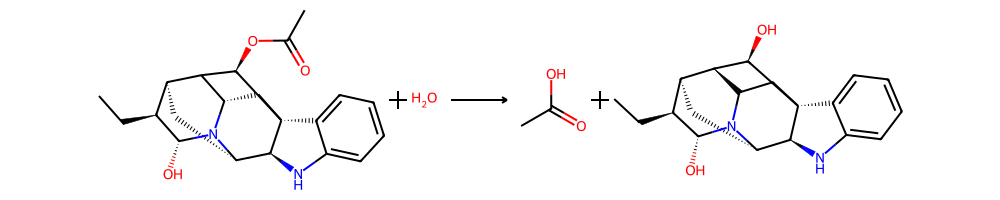

In [38]:
from rdkit import Chem
from rdkit.Chem import Draw 
from IPython.display import display

# Example SMILES string
smiles = "CC[C@H]1[C@@H]2C[C@H]3[C@@H]4Nc5ccccc5[C@]45C[C@@H](C2[C@H]5OC(C)=O)N3[C@@H]1O.O>>CC(=O)O.CC[C@H]1[C@@H]2C[C@H]3[C@@H]4Nc5ccccc5[C@]45CC([C@H]2[C@H]5O)N3[C@@H]1O"
rxn = rdChemReactions.ReactionFromSmarts(smiles, useSmiles=True)

img = Draw.ReactionToImage(rxn)
display(img)

### Thermophilic esterases (EC 3.1.X.Y) --> NEED TO ADAPT THIS

In [ ]:
df_extremophiles = pd.read_pickle('/home/helen/cec_degrader/generalize/data/extremeophiles.pkl')
df  = pd.read_csv('data/EnzymeCAGE_train.csv')
df_protein = pd.read_pickle('/home/helen/cec_degrader/generalize/data/protein.pkl')

# Positive samples only
df = df[df['Label'] == 1]

# Add EC number from protein.pkl if not present 
ec_mapping = df_protein.groupby('Entry')['EC number'].apply(list).to_dict()
df['EC number'] = df['UniprotID'].map(ec_mapping)
df['EC number'] = df['EC number'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Filter to only extremophilic/thermophilic enzymes
df = df[df['UniprotID'].isin(df_extremophiles['Entry'])]

# Filter to only esterases (EC 3.1)
uniprot_with_3_1 = df.loc[df['EC number'].fillna('').str.startswith('3.1.'), 'UniprotID'].unique()
df = df[df['UniprotID'].isin(uniprot_with_3_1)].copy()
df = df.reset_index(drop=True)

# Split reaction SMILEs into substrates and products
df[['substrates', 'products']] = df['SMILES'].str.split('>>', expand=True)

# Remove H20 as a substrate
def remove_water(smiles):
    if pd.isna(smiles):
        return smiles
    parts = smiles.split('.')
    parts = [p for p in parts if p != '[H]O[H]']
    return '.'.join(parts)
df['substrates'] = df['substrates'].apply(remove_water)

# Number of substrates and products per entry
df['number_substrates'] = df['substrates'].str.count('\.') + 1
df['number_products'] = df['products'].str.count('\.') + 1

#df.to_pickle('data/EnzymeCAGE_train_extremophiles_EC3p1.pkl')

# 332 entries
# Contains all thermophilic esterases irrespective of promiscuity from the enzymeCAGE training data. 
# This is fewer entries than the number of esterases in the whole extremophiles_df which is 2232! Can we also use all of those???????